In [2]:
import json
from matplotlib import pyplot as plt

In [3]:
with open("average_actions.json") as f:
    data = json.load(f)

type(data)

list

In [4]:
import torch
actions = torch.tensor(data, dtype=torch.float32)
actions.shape

torch.Size([2999, 7])

In [5]:
from statsmodels.tsa.stattools import adfuller
res = [adfuller(actions[:, i]) for i in range(7)]
print('critical values at different levels:')
for k, v in res[0][4].items():
    print('\t%s: %.3f' % (k, v))

print('p-value for a0: %f' % res[0][1])
print('p-value for a1: %f' % res[1][1])
print('p-value for a2: %f' % res[2][1])
print('p-value for a3: %f' % res[3][1])
print('p-value for a4: %f' % res[4][1])
print('p-value for a5: %f' % res[5][1])
print('p-value for a6: %f' % res[6][1])

critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567
p-value for a0: 0.000000
p-value for a1: 0.000000
p-value for a2: 0.000000
p-value for a3: 0.000000
p-value for a4: 0.000000
p-value for a5: 0.000000
p-value for a6: 0.000000


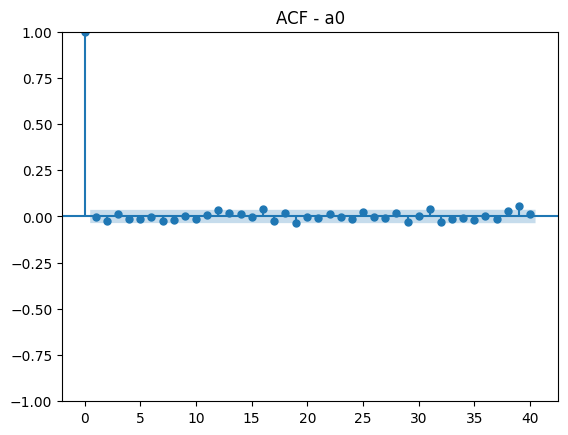

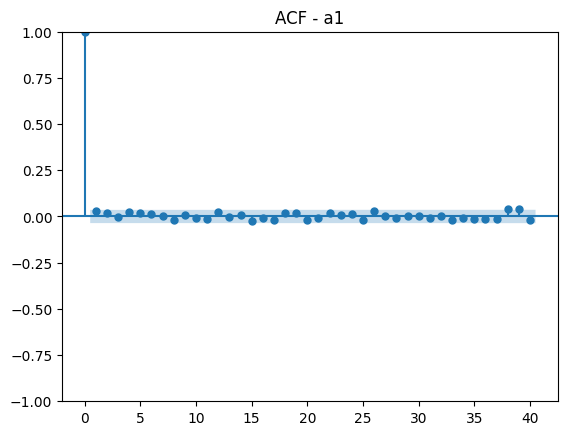

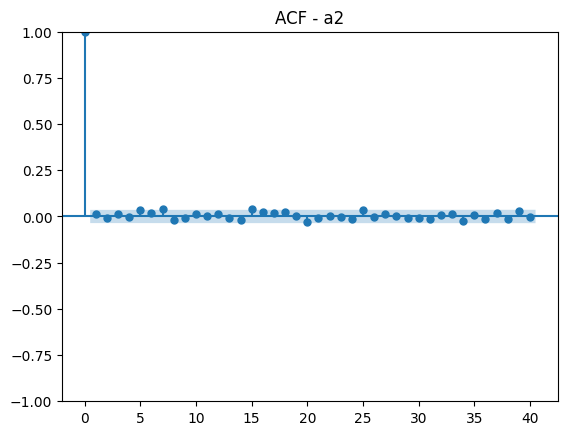

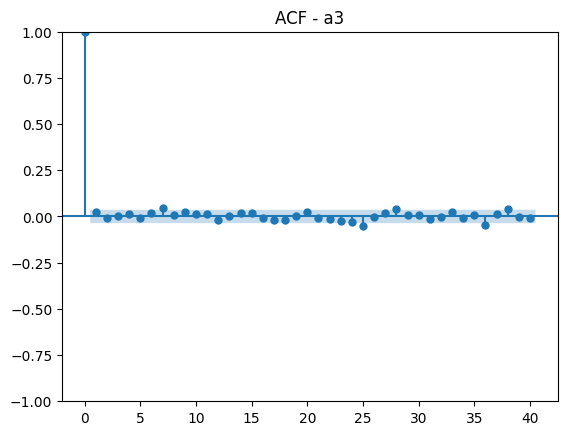

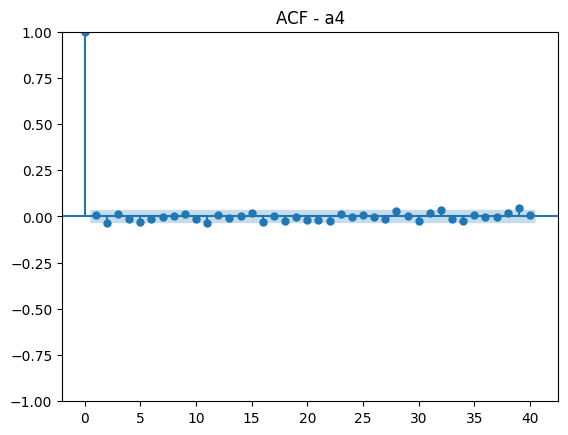

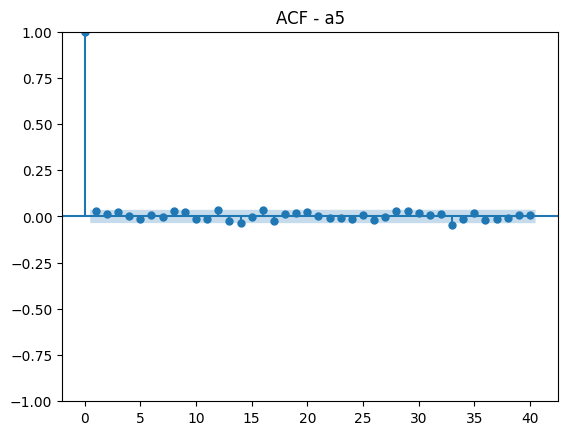

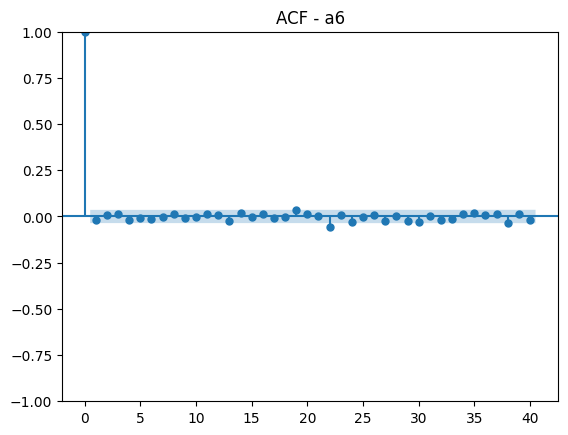

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
# autokorelacja w szeregu pomiędzy wartościami x, a x_i i < 40
for i in range(7):
    plot_acf(actions[:, i], lags=40, title=f"ACF - a{i}")